# Speed dating data manipulation #Block2
Jedha certification - speed dating project.

In [166]:
# import
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Configurations


In [167]:
config = json.load(open("../config.json", "r"))
color_palette = config["color_palette"]
display(f"Customize color : {color_palette}")

"Customize color : ['#265952', '#DFCEEB', '#DBDE2F', '#45201E', '#c7ac92', '#a44a3f']"

In [168]:
# searbon customize palette color
sns.set_palette(sns.color_palette(color_palette))
# sns.set_theme()

### Dataset

In [169]:
# load dataframe
def load_data(file_name) :
    """ load_data()
    """
    # read
    df_dating = pd.read_csv(file_name, encoding='ISO-8859-1')
    display(df_dating.sample(2))
    return df_dating

## RUN
file_name = "../data/Speed Dating Data.csv"
df_dating = load_data(file_name)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2177,159,2.0,1,4,2,7,16,6,8.0,15,...,6.0,12.0,9.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN
6442,417,2.0,0,3,1,16,8,8,8.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive statistics
Describe dataset, verify come assumptions & others stuff.

#### General stats

In [170]:
## info
display(df_dating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


None

In [171]:
## columns
columns_name = df_dating.columns
print(f"Features in dataset are : {columns_name}")



Features in dataset are : Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)


In [172]:
## number of values
n_records, n_features = df_dating.shape[0], df_dating.shape[1]
print("Dataset contains {} results and {} features.".format(n_records, n_features))

Dataset contains 8378 results and 195 features.


In [173]:
## number of different people
n_people = df_dating["iid"].max()
print("We have {} unique people in dataset.".format(n_people))

We have 552 unique people in dataset.


#### Gender, age, race 
assumption : Is communuatarism a primary attribute in the choice of a partner?

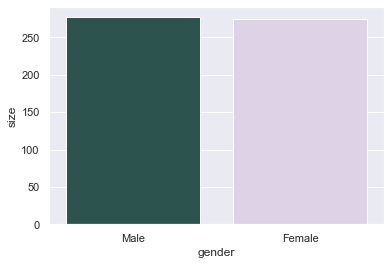

In [180]:
## gender proportion
### apply func
def gender_number_to_name(x) :
    gender_name = None
    if x == 1 :
        gender_name = "Male"
    if x == 0 :
        gender_name = "Female"
    return gender_name
    
df_gender = (df_dating[["iid", "gender", "age"]].groupby(["iid", "gender"]).first()).reset_index()["gender"].value_counts()
df_gender = pd.DataFrame(df_gender).reset_index()
df_gender = df_gender.rename(columns={"index" : "gender", "gender":"size"})
df_gender["gender"] = df_gender["gender"].apply(lambda gender : gender_number_to_name(gender))

# bar plot by gender
ax = sns.barplot(x="gender", y="size", data=df_gender)


,race,size
0,Black,420
1,European,4722
2,Latino,664
3,Asian,1978
4,Other,521


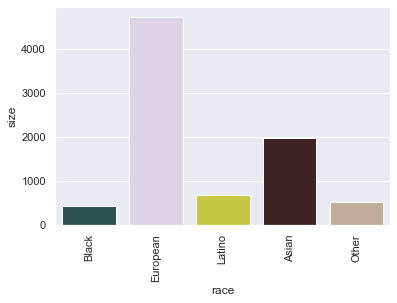

In [175]:
## race proportion
### apply func
def race_number_to_name(x) :
    race_name = None
    if x == 1 :
        race_name = "Black" #/African American
    if x == 2 :
        race_name = "European" #/Caucasian-American
    if x == 3 :
        race_name = "Latino" #/Hispanic American
    if x == 4 :
        race_name = "Asian" #/Pacific Islander/Asian-American
    if x == 5 :
        race_name = "Native American"
    if x == 6 :
        race_name = "Other"

    return race_name

# size by race 
df_race = pd.DataFrame(df_dating.groupby(["race_o"]).size()).reset_index()
df_race = df_race.rename(columns={0 : "size", "race_o" : "race"})
df_race["race"] = df_race["race"].apply(lambda race : race_number_to_name(race))
display(df_race)

# bar plot by race
ax = sns.barplot(x="race", y="size", data=df_race)
ax.tick_params(axis='x', rotation=90)


Text(0.5, 1.0, "Boxplot : Distidution de l'âge en fonction du genre")

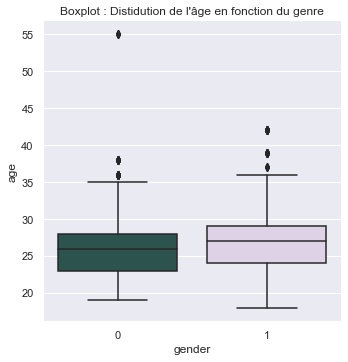

In [182]:
## age
### sub dataframe
df_age = df_dating[["iid", "gender", "age"]]
sns.catplot(x = 'gender', y = 'age', data = df_age, kind = 'box')
plt.title("Boxplot: Age distribution by gender")

### Assumptions
Assumption 1 : More chance of getting a date if you intend to just socialize? \
Assumption 2 : Men are afraid of intelligent, powerful women? \
Assumption 3 : Is religion an important factor in the choice of partners seeking marriage?

#### AS1 : Is communuatarism a primary attribute in the choice of a partner?

,iid,match,goal,explain
7462,511,0,2.0,To meet new people
4685,310,0,1.0,Seemed like a fun night out


452

,goal,match,explain
0,1.0,42.5,Seemed like a fun night out
1,2.0,34.1,To meet new people
2,3.0,8.0,To get a date
3,4.0,4.2,Looking for a serious relationship
4,5.0,6.0,To say I did it
5,6.0,4.0,Other


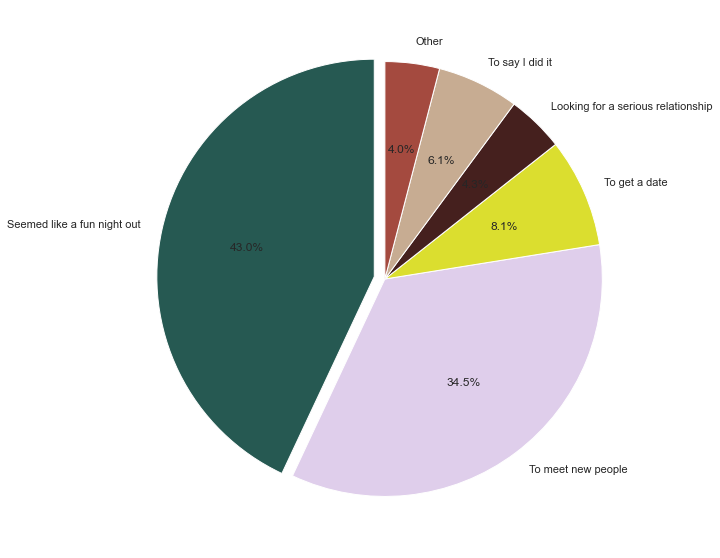

In [179]:
# AS1
## func 
def goal_number_to_name(goal_number) :
    goal_name = None

    if goal_number == 1 :
        goal_name = "Seemed like a fun night out"

    if goal_number == 2 :
        goal_name = "To meet new people"

    if goal_number == 3 :
        goal_name = "To get a date"

    if goal_number == 4 :
        goal_name = "Looking for a serious relationship"

    if goal_number == 5 :
        goal_name = "To say I did it"

    if goal_number == 6 :
        goal_name = "Other"

    return goal_name

# fetch goal attributes
df_goal = df_dating[["iid", "match", "goal"]].copy()
df_goal["explain"] = df_goal["goal"].apply(lambda goal_number : goal_number_to_name(goal_number))
display(df_goal.sample(2))

# number of people who got a match
total_match = len(df_goal[df_goal["match"]==1].iid.unique())
display(total_match)

# number of matches by goal (unique iid)
df_matches_by_goal = df_goal[df_goal["match"]==1] \
                    .groupby("iid") \
                    .first() \
                    .groupby("goal") \
                    .count()

# number of matches by goal in percentage
df_matches_by_goal = pd.DataFrame(round(100 * (df_matches_by_goal["match"] / total_match), 1))\
                    .reset_index()

# transform goal number to label
df_matches_by_goal["explain"] = df_matches_by_goal["goal"] \
                                .apply(lambda goal_number : goal_number_to_name(goal_number))

display(df_matches_by_goal)


# pi charts of matches by people intention
match_goal = df_matches_by_goal["match"].values
names = list(df_matches_by_goal["explain"].unique())
explode = (0.05,0,0,0,0,0)

fig, ax = plt.subplots(figsize=(10,10))
_ = ax.pie(match_goal, labels=names, 
       autopct="%1.1f%%", 
       explode=explode, 
       shadow=False,
       startangle=90) #colors=color_palette[:4],

### Probability (2nd date)